Let's generate N time discrete series, each consisting of T observations of a random variable X.

First, we load the necessary python packages.
                    

In [141]:
# Check python version
import sys
print("Python is:", sys.version)

# Import matplotlib and numpy
import matplotlib
import matplotlib.pyplot as plt
print("Matplotlib is:", matplotlib.__version__)

import numpy as np
print("numpy is:", np.__version__)

import random
from scipy.stats import triang
from scipy.stats import norm
from scipy.stats import truncnorm

%matplotlib inline

Python is: 3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:07:29) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Matplotlib is: 2.1.0
numpy is: 1.13.3


Next, we generate the series of random numbers. $N$ is the number of different series, and $T$ specifies how many observation we have in each series.

We also set the range of the distribution we will consider [x_min, x_max], and the number of bins, n_bins, into which we will split this range. 

In [157]:
N=5000
T=100

x_min=-5
x_max=5
n_bins=20

X=np.zeros((N,T))
for i in range(0,N):
    for j in range(0,T):
#        X[i][j]=np.random.triangular(x_min,(x_min+x_max)/2,x_max)
        X[i][j]=np.random.normal(0,1)



Next, we

1. count observations in each bin, for each of the N time series, yielding N histograms.

2. compute the cumulative number of all events smaller than the upper end of each bin, for each of the N time series.

3. estimate the uncertainty in this number as the standard deviation over all all time series.

4. construct the cumulative decision weight $F_w$ by adding, for one time series (the 0th one [or the mean or median]), the uncertainty in the count, and then normalize.

5. find the CDF of the distribution we used to generate the data.

In [158]:
#1 count
n=np.empty((N,n_bins))

for series in range(0,N):
    n[series][:]=np.histogram(X[series][:],bins=n_bins,range=(x_min,x_max))[0]

In [159]:
#2 find cumulative count
cumulative=np.cumsum(n,1)

#3 find uncertainty in cumulative count
uncertainty=np.std(cumulative,0)

#4 construct decision weights and normalize
Fw=np.histogram(X[series][:],bins=n_bins,range=(x_min,x_max))[1]
Fw[0]=0
for i in range(0,n_bins):
    Fw[i+1]=cumulative[0][i]+uncertainty[i]
#    Fw[i+1]=np.mean(cumulative,0)[i]+uncertainty[i]
#    Fw[i+1]=np.median(cumulative,0)[i]+uncertainty[i]
 
Fw=Fw/Fw[-1]

#5 find reference CDF
#Fp=triang.cdf(np.histogram(X[series][:],bins=n_bins,range=(x_min,x_max))[1],.5,0,1)
Fp=norm.cdf(np.histogram(X[series][:],bins=n_bins,range=(x_min,x_max))[1],0,1)


Finally, we display the resulting ``probability weighting,'' in the usual way and recover the inverse-S curve... or do we?

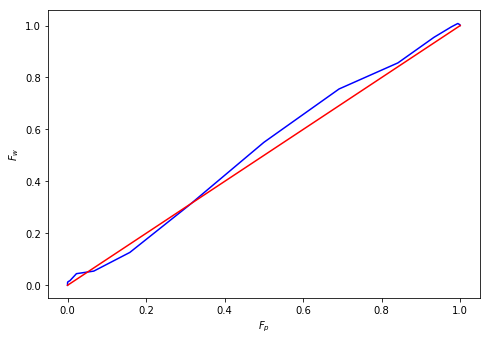

In [160]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(Fp,Fw,'b',label='')
ax.plot(Fp,Fp,'r',label='')
ax.legend()
ax.set_xlabel(r'$F_p$')
ax.set_ylabel(r'$F_w$')
plt.show() 

In [155]:
Fw

array([ 0.        ,  0.06265344,  0.06886235,  0.13602436,  0.1922739 ,
        0.25939909,  0.34605522,  0.41122772,  0.45554959,  0.53993567,
        0.6117712 ,  0.70287413,  0.77285691,  0.81124713,  0.86881869,
        0.91626221,  0.95254707,  0.96921939,  0.96533893,  0.99255592,  1.        ])

In [156]:
Fp

array([ 0.02275013,  0.03593032,  0.05479929,  0.08075666,  0.11506967,
        0.15865525,  0.2118554 ,  0.27425312,  0.34457826,  0.42074029,
        0.5       ,  0.57925971,  0.65542174,  0.72574688,  0.7881446 ,
        0.84134475,  0.88493033,  0.91924334,  0.94520071,  0.96406968,
        0.97724987])